In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('merged_preprocessed_crop_yield.csv')

print("Shape:", df.shape)
df.head()

Shape: (54804, 20)


,Year,Decade,State Name,State_encoded,Dist Name,Crop,Crop_encoded,Season,Season_encoded,Area_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Temperature_C,Humidity_%,pH,Rainfall_mm,Wind_Speed_m_s,Solar_Radiation_MJ_m2_day,Yield_kg_per_ha
0,1966,1960,chhattisgarh,3,durg,rice,3,Unknown,4,548000.0,8.43975,4.05108,7.42698,25,80,6.5,1200,2.0,18,337.59
1,1966,1960,chhattisgarh,3,durg,maize,2,Unknown,4,3000.0,18.00009,8.00004,11.33339,22,70,6.0,800,2.5,20,666.67
2,1966,1960,chhattisgarh,3,durg,chickpea,0,Unknown,4,54000.0,9.00000,5.00000,9.00000,20,60,6.5,600,1.5,16,500.00
3,1967,1960,chhattisgarh,3,durg,rice,3,Unknown,4,547000.0,18.69275,8.97252,16.44962,25,80,6.5,1200,2.0,18,747.71
4,1967,1960,chhattisgarh,3,durg,maize,2,Unknown,4,3000.0,27.00000,12.00000,17.00000,22,70,6.0,800,2.5,20,1000.00


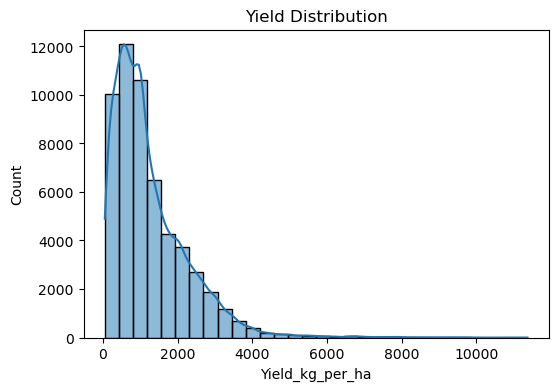

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['Yield_kg_per_ha'], bins=30, kde=True)
plt.title("Yield Distribution")
plt.show()

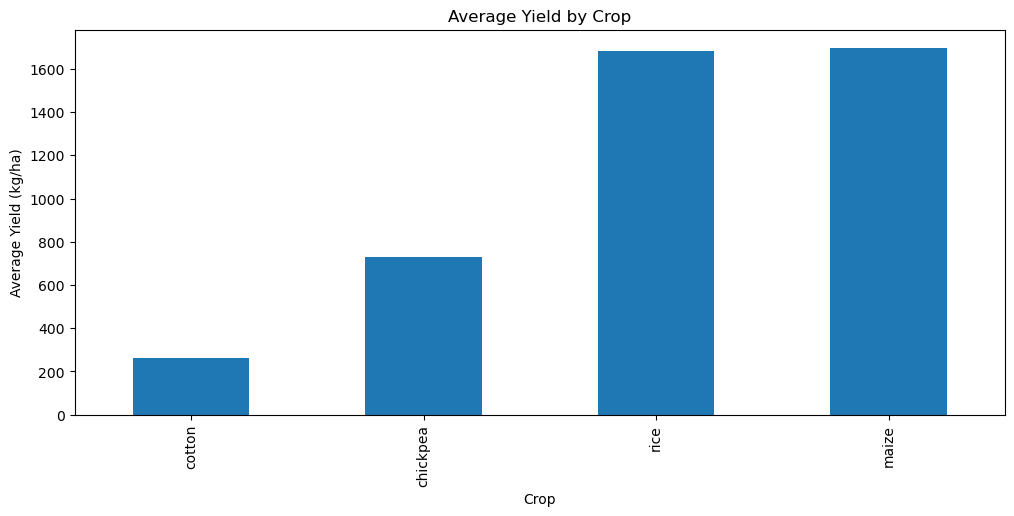

In [5]:
plt.figure(figsize=(12,5))
df.groupby('Crop')['Yield_kg_per_ha'].mean().sort_values().plot(kind='bar')
plt.ylabel("Average Yield (kg/ha)")
plt.title("Average Yield by Crop")
plt.show()

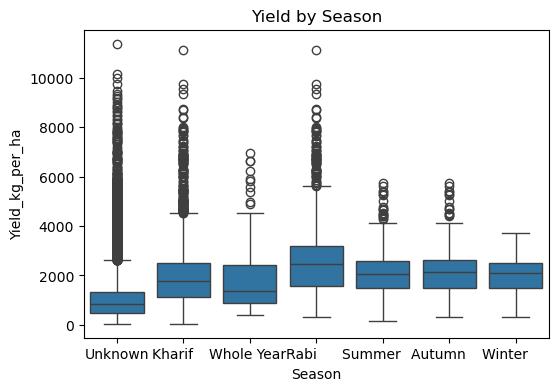

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Season', y='Yield_kg_per_ha', data=df)
plt.title("Yield by Season")
plt.show()

In [7]:
# Calculate production (kg)
df['Total_Production_kg'] = df['Area_ha'] * df['Yield_kg_per_ha']

# Group by state
state_production = (
    df.groupby('State Name')['Total_Production_kg']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

state_production

State Name
west bengal       7.757385e+11
uttar pradesh     6.635628e+11
andhra pradesh    4.877258e+11
bihar             4.166415e+11
karnataka         3.847593e+11
punjab            3.807277e+11
tamil nadu        3.176185e+11
telangana         3.081137e+11
orissa            2.985275e+11
assam             2.911419e+11
Name: Total_Production_kg, dtype: float64

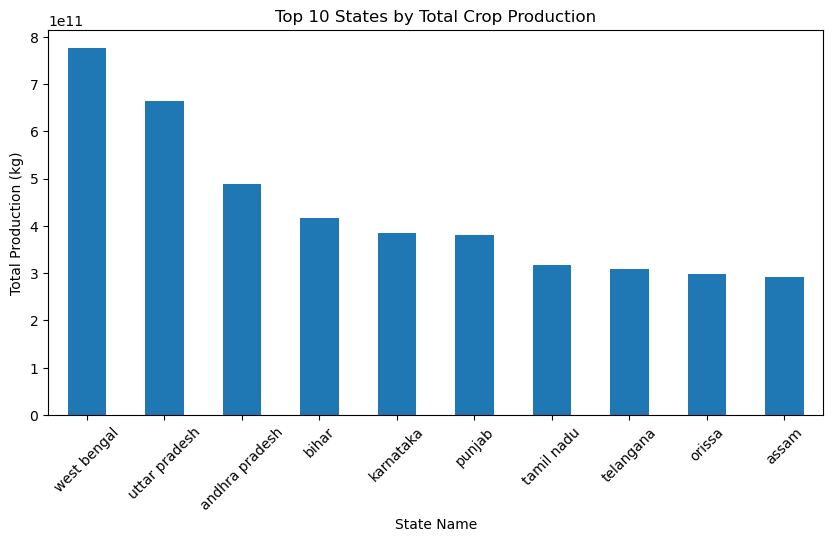

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
state_production.plot(kind='bar')
plt.ylabel("Total Production (kg)")
plt.title("Top 10 States by Total Crop Production")
plt.xticks(rotation=45)
plt.show()